In [2]:
# This class exists to exercise the functionality of the data importing classes

import tensorflow as tf
import data_utils
import matplotlib
from matplotlib import patches
from matplotlib.pyplot import *

In [17]:
# Exercise loading the dataset
data=data_utils.DataLoaderFull(input_file='tensorflow-great-barrier-reef')
inputs = data.get_training(validation_split=0.2, batch_size=64, shuffle=True)

Found 23501 files belonging to 3 classes.
Using 18801 files for training.
Found 23501 files belonging to 3 classes.
Using 4700 files for validation.


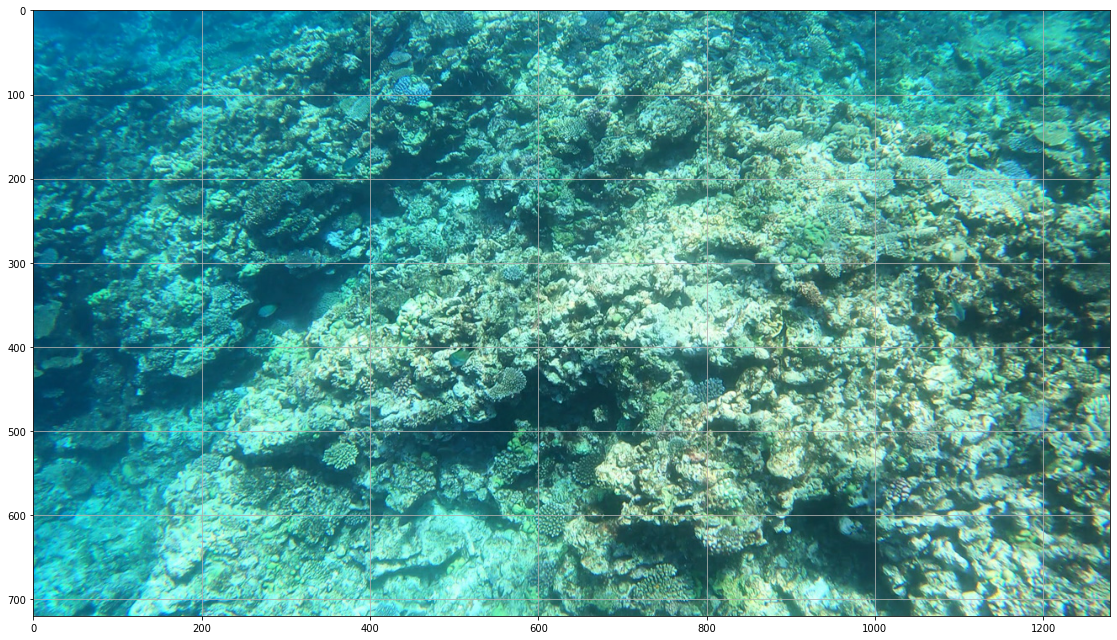

In [37]:
# Check that the image batch looks like what we expect
image,label = inputs.__iter__().next()

figure(figsize=(16,9))
imshow(image[1].numpy() / 255.)
for annotation in data.decode_label(label[1]):
    print(annotation)
    rect = patches.Rectangle((annotation['x'], annotation['y']), 
                         annotation['width'], annotation['height'], 
                         linewidth=4, edgecolor='y', facecolor='none')
    gca().add_patch(rect)
gca().grid('True')
tight_layout()
show()

In [107]:
# Get a set of thumbnail images, these should have correct classifications
reload(data_utils)
data=data_utils.DataLoaderThumbnail(input_file='tensorflow-great-barrier-reef')
images = data.get_training(validation_split=0.2, batch_size=9, shuffle=True)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
Found 23501 files belonging to 2 classes.
Using 18801 files for training.
Found 23501 files belonging to 2 classes.
Using 4700 files for validation.


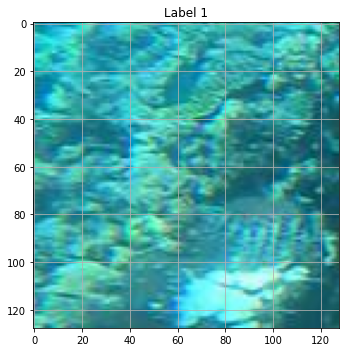

In [109]:
# Run and check a few for correctness
image, label = images.__iter__().next()

figure(figsize=(5,5))
imshow(image[0].numpy() / 255.)
title('Label %d'%label.numpy()[0])
gca().grid('True')
tight_layout()
show()